In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#id : 선수 고유의 아이디
#name : 이름
#age : 나이
#continent : 선수들의 국적이 포함되어 있는 대륙입니다
#contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
#position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
#prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
#reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
#stat_overall : 선수의 현재 능력치 입니다.
#stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
#stat_skill_moves : 선수의 개인기 능력치 입니다.
#value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다

In [2]:
train = pd.read_csv("FIFA_train.csv")
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [3]:
test = pd.read_csv("FIFA_test.csv")
test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [6]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [7]:
test.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000
mean,7846.258098,25.297806,1.143939,67.336991,72.107628,2.414838
std,4870.339361,4.628236,0.448465,6.908814,6.133428,0.781153
min,1.000000,16.000000,1.000000,47.000000,52.000000,1.000000
25%,3466.250000,22.000000,1.000000,63.000000,68.000000,2.000000
50%,7643.500000,25.000000,1.000000,67.000000,72.000000,2.000000
75%,11967.000000,29.000000,1.000000,72.000000,76.000000,3.000000
max,16943.000000,42.000000,5.000000,94.000000,95.000000,5.000000


In [8]:
train["continent"].value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [9]:
train["position"].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [10]:
train["prefer_foot"].value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

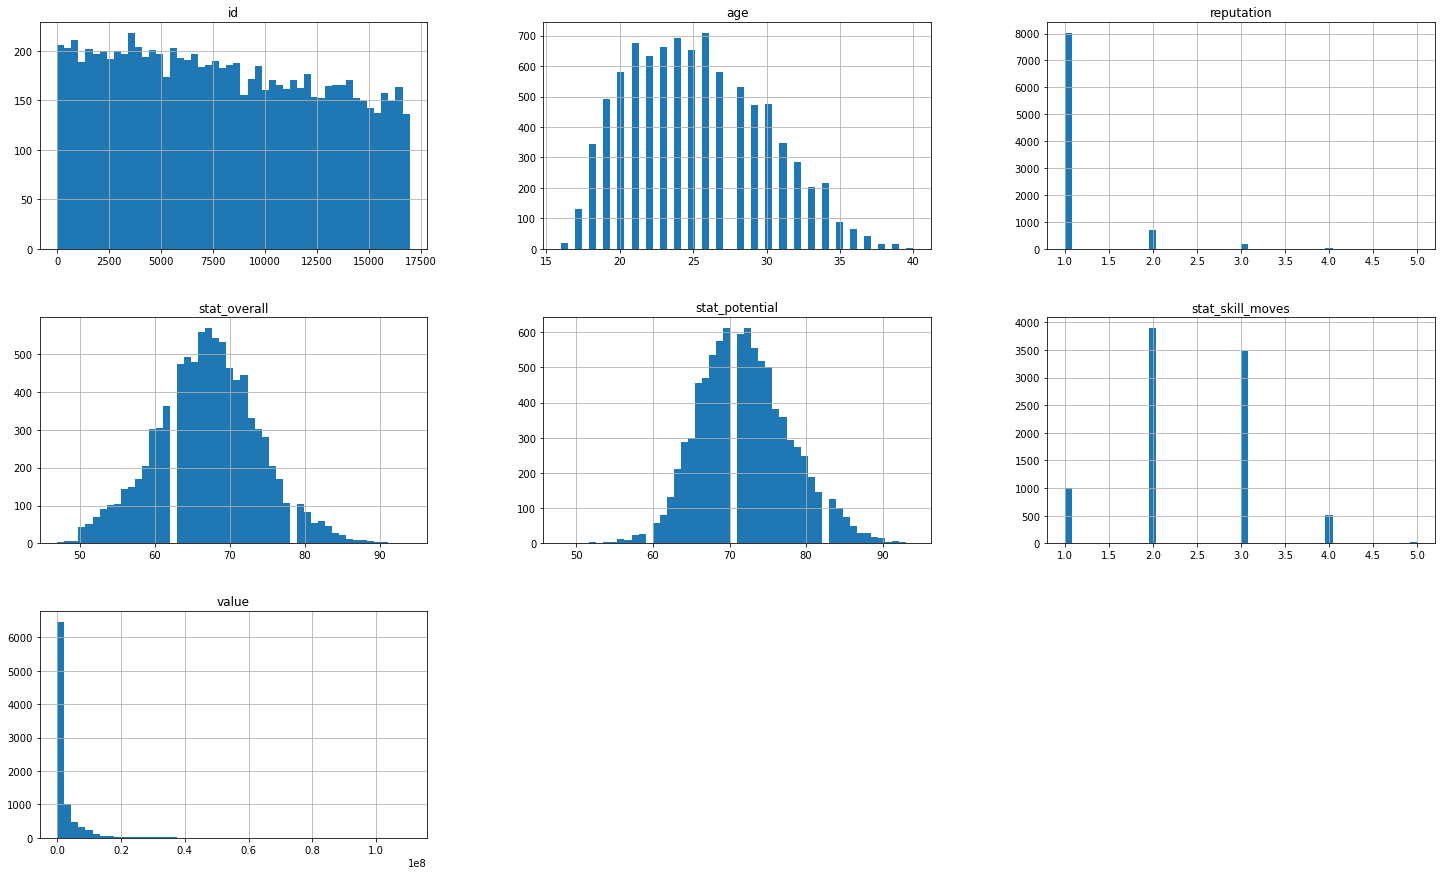

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(25,15))
plt.show()

<AxesSubplot:>

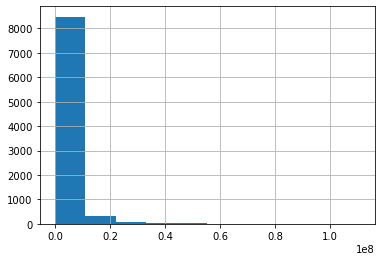

In [12]:
train["value"].hist()

<AxesSubplot:>

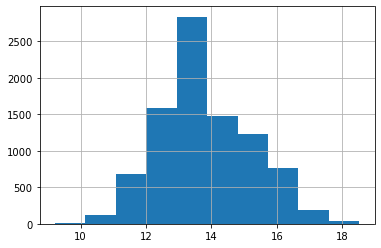

In [13]:
train["value_log"] = np.log(train["value"]+1)
train["value_log"].hist()

In [14]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,18.520526
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,18.092177
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,18.197537
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,17.747336
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,18.035018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0,11.002117
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0,10.596660
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,10.819798
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0,10.819798


In [15]:
X_train = train.drop(['value', 'value_log', 'name' , 'id'], axis=1)
y_train = train[['name','value_log']]
print(X_train.shape) 
print(y_train.shape)

display(X_train.head())
display(y_train.head())

(8932, 9)
(8932, 2)


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,31,south america,2021,ST,left,5.0,94,94,4.0
1,27,europe,2020,GK,right,4.0,91,93,1.0
2,31,south america,2021,ST,right,5.0,91,91,3.0
3,32,europe,2020,DF,right,4.0,91,91,3.0
4,25,europe,2021,GK,right,3.0,90,93,1.0


,name,value_log
0,L. Messi,18.520526
1,De Gea,18.092177
2,L. Suárez,18.197537
3,Sergio Ramos,17.747336
4,J. Oblak,18.035018


In [16]:
class ArrayChanger:
    def __init__(self):
        pass

    def replace_value(self, year, arr):
        for i in range(len(arr)):
            if str(year) in arr[i]:
                arr[i] = str(year)
        return arr

    def replace_all(self, arr):
        print("Replaced array for 2018: ", self.replace_value(2018, arr))
        print("Replaced array for 2019: ", self.replace_value(2019, arr))
        print("Replaced array for 2020: ", self.replace_value(2020, arr))

ac = ArrayChanger()
ac.replace_all(train['contract_until'])
ac.replace_all(test['contract_until'])

<ipython-input-16-cba54a1de6ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = str(year)


Replaced array for 2018:  0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object
Replaced array for 2019:  0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object
Replaced array for 2020:  0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object
Replaced array for 2018:  0       2022
1       2022
2       2023
3       2020
4       2020
        ... 
3823    2021
3824    2018
3825    2021
3826    2020
3827    2021
Name: contract_until, Length: 3828, dtype: object
Replaced array for 2019:  0       2022
1       2022
2       2023
3       2020
4       2020
        ... 
3823    2021
3824   

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

# 수치형 / 범주형 변수 선언
num_var = X_train.select_dtypes(include=np.number).columns.tolist()
cat_var = X_train.select_dtypes(exclude=np.number).columns.tolist()

# 수치형 변수 전처리를 위한 파이프라인 설정
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# 범주형 변수 전처리를 위한 파이프라인 설정
cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder(sparse=False, drop='if_binary'))
    ])

# 수치형 / 범주형 변수에 대한 자동 전처리를 위한 파이프라인 설정

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_var),
        ("cat", cat_pipeline, cat_var)])

X_train_pretained = full_pipeline.fit_transform(X_train)

In [20]:
df=pd.DataFrame(X_train_pretained)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.249309,9.130280,3.925708,3.674598,2.059652,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.386357,6.770499,3.488041,3.507592,-1.806307,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.249309,9.130280,3.488041,3.173580,0.770999,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.465046,6.770499,3.488041,3.173580,0.770999,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.045118,4.410719,3.342152,3.507592,-1.806307,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,-1.555283,-0.308843,-2.785186,-1.502586,0.770999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8928,-1.339545,-0.308843,-2.931075,-2.170610,-0.517654,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8929,-1.555283,-0.308843,-2.931075,-1.335580,-0.517654,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8930,-1.555283,-0.308843,-2.931075,-1.168574,-1.806307,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
num_var

['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']

In [22]:
cat_var

['continent', 'contract_until', 'position', 'prefer_foot']

In [23]:
train['continent'].unique()

array(['south america', 'europe', 'africa', 'asia', 'oceania'],
      dtype=object)

<AxesSubplot:xlabel='continent', ylabel='count'>

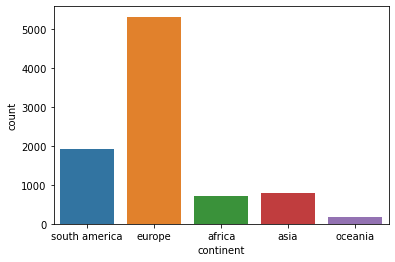

In [24]:
sns.countplot(x='continent',  data= train)

In [25]:
train['contract_until'].unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018',
       '2025'], dtype=object)

<AxesSubplot:xlabel='contract_until', ylabel='count'>

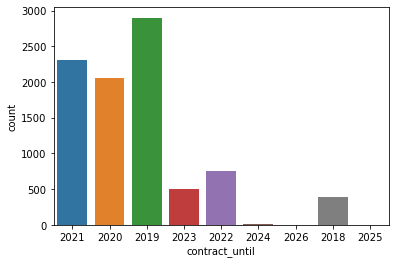

In [26]:
sns.countplot(x='contract_until',  data= train )

<AxesSubplot:xlabel='position', ylabel='count'>

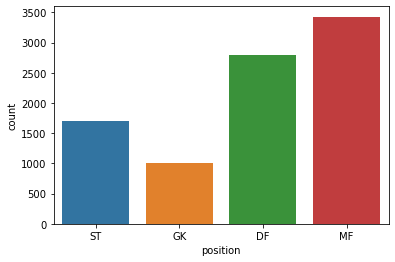

In [27]:
sns.countplot(x='position', data= train)

<AxesSubplot:xlabel='prefer_foot', ylabel='count'>

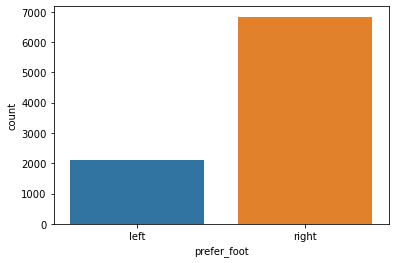

In [28]:
sns.countplot(x='prefer_foot',  data= train)

<AxesSubplot:>

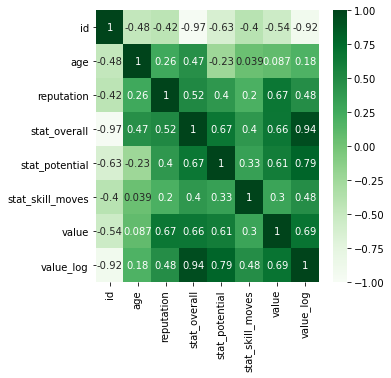

In [29]:
#heatmap으로 상관관계를 표시
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(train.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [38]:
train['stat_overall * stat_potential/100 ']=train.iloc[:,8]*train.iloc[:,9]/100

In [39]:
train['age * stat_potential']=train.iloc[:,2]*train.iloc[:,9]

In [45]:
train['stat_skill_moves / age']= train.iloc[:,10]/ train.iloc[:,2]
train=train.drop(['age * stat_potential'], axis=1)

In [46]:
corr=train.corr()
corr

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,value_log,stat_overall * stat_potential/100,age * stat_potential,stat_skill_moves / age
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280,-0.915650,-0.891115,-0.765666,-0.120472
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319,0.184635,0.167173,0.895652,-0.442716
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982,0.480683,0.536051,0.470820,0.034314
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444,0.938548,0.930102,0.773918,0.122509
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907,0.793474,0.889177,0.218159,0.427368
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500,0.476796,0.401463,0.188133,0.858329
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000,0.694398,0.732745,0.377773,0.208195
value_log,-0.915650,0.184635,0.480683,0.938548,0.793474,0.476796,0.694398,1.000000,0.956842,0.552299,0.312481
stat_overall * stat_potential/100,-0.891115,0.167173,0.536051,0.930102,0.889177,0.401463,0.732745,0.956842,1.000000,0.572688,0.280538
age * stat_potential,-0.765666,0.895652,0.470820,0.773918,0.218159,0.188133,0.377773,0.552299,0.572688,1.000000,-0.257427
